# **Proyek Analisi Data**

- Nama : **Edy Mochamad Yusuf**
- Email : edymochamady@gmail.com
- id Dicoding : -

## **Cek versi python yang digunakan**

In [1]:
!python --version

Python 3.11.4


## **Cek env yang digunakan sudah benar atau belum**

In [2]:
!conda info


     active environment : submission
    active env location : C:\Users\ASUS\anaconda3\envs\submission
            shell level : 1
       user config file : C:\Users\ASUS\.condarc
 populated config files : C:\Users\ASUS\.condarc
          conda version : 22.11.1
    conda-build version : 3.22.0
         python version : 3.9.13.final.0
       virtual packages : __archspec=1=x86_64
                          __win=0=0
       base environment : C:\Users\ASUS\anaconda3  (writable)
      conda av data dir : C:\Users\ASUS\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package

# **Menentukan Pertanyaan Bisnis**

- Dari manakah 5 kota teratas asal seller terbanyak berasal?
- Metode pembayaran apa yang paling disukai oleh customer dalam pembelian produk?
- Produk apa yang memiliki sales tertinggi?

# **Menyiapkan library yang digunakan**

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cek versi untuk streamlit, requirements.txt
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.5.3
1.25.0
0.12.2


# **Data Wrangling**

## **Gathering Data**

In [4]:
customers = pd.read_csv('./E-Commerce Public Dataset/customers_dataset.csv')
customers.head(6)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC


In [5]:
geolocation = pd.read_csv('./E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation.head(6)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


In [6]:
order_items = pd.read_csv('./E-Commerce Public Dataset/order_items_dataset.csv')
order_items.head(6)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69


In [7]:
payments = pd.read_csv('./E-Commerce Public Dataset/order_payments_dataset.csv')
payments.head(6)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12


In [8]:
reviews = pd.read_csv('./E-Commerce Public Dataset/order_reviews_dataset.csv')
reviews.head(6)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37


In [9]:
orders = pd.read_csv('./E-Commerce Public Dataset/orders_dataset.csv')
orders.head(6)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00


In [10]:
category_product = pd.read_csv('./E-Commerce Public Dataset/product_category_name_translation.csv')
category_product.head(6)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure


In [11]:
products = pd.read_csv('./E-Commerce Public Dataset/products_dataset.csv')
products.head(6)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0


In [12]:
sellers = pd.read_csv('./E-Commerce Public Dataset/sellers_dataset.csv')
sellers.head(6)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ


## **Assesing Data**

#### **Cek Missing Value dan duplikasi data customers**

In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan output diatas, dataset customers memiliki 5 column, setiap columnnya memiliki 99441 row dengan 4 column memiliki tipe data integer dan 1 column bertipe data object.

In [14]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Pada dataset customers disetiap columnnya tidak ditemukan missing value.

In [15]:
print(f'Jumlah duplikasi = {customers.duplicated().sum()}')

Jumlah duplikasi = 0


In [16]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### **Cek Missing Value dan duplikasi data geolocation**

In [17]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Berdasarkan output diatas, dataset geolocation memiliki 5 column, setiap columnnya memiliki 1000163 row dengan 1 column memiliki tipe data integer, 2 column bertipe data float dan 2 column bertipe data object.

In [18]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [19]:
print(f'Jumlah duplikasi = {geolocation.duplicated().sum()}')

Jumlah duplikasi = 261831


In [20]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### **Cek Missing Value dan duplikasi data order_items**

In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Berdasarkan output diatas, dataset order_items memiliki 7 column, setiap columnnya memiliki 112650 row dengan 1 column memiliki tipe data integer, 2 column bertipe data float dan 4 column bertipe data object.

In [22]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [23]:
print(f'Jumlah duplikasi = {order_items.duplicated().sum()}')

Jumlah duplikasi = 0


In [24]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### **Cek Missing Value dan duplikasi data payments**

In [25]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Berdasarkan output diatas, dataset payments memiliki 5 column, setiap columnnya memiliki 103886 row dengan 1 column memiliki tipe data float, 2 column bertipe data integer dan 2 column bertipe data object.

In [26]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [27]:
print(f'Jumlah duplikasi = {payments.duplicated().sum()}')

Jumlah duplikasi = 0


In [28]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### **Cek Missing Value dan duplikasi data reviews**

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Berdasarkan output diatas, dataset reviews memiliki 7 column, setiap columnnya memiliki 99224 row dengan 1 column memiliki tipe data integer dan 6 column bertipe data object.

In [30]:
reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Berdasarkan output diatas ditemukan missing value pada column review_comment_title dan review_comment_message. Kemungkinan kita akan drop kedua column tersebut karna dari valuenya juga tidak kita butuhkan.

In [31]:
print(f'Jumlah duplikasi = {reviews.duplicated().sum()}')

Jumlah duplikasi = 0


In [32]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### **Cek Missing Value dan duplikasi data orders**

In [33]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan output diatas, dataset orders memiliki 8 column, setiap columnnya memiliki 99441 row dengan 8 column memiliki tipe data object.

In [34]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Berdasarkan output diatas, ditemukannya missing value pada 3 column. Column order_approved_at 160, column order_delivered_carrier_date 1783 dan order_delivered_customer_date 2965.

In [35]:
print(f'Jumlah duplikasi = {orders.duplicated().sum()}')

Jumlah duplikasi = 0


In [36]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### **Cek Missing Value dan duplikasi data category_product**

In [37]:
category_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Berdasarkan output diatas, dataset reviews memiliki 2 column, setiap columnnya memiliki 71 row dengan 2 column memiliki tipe data object.

In [38]:
category_product.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
print(f'Jumlah duplikasi = {category_product.duplicated().sum()}')

Jumlah duplikasi = 0


#### **Cek Missing Value dan duplikasi data products**

In [40]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Berdasarkan output diatas, dataset reviews memiliki 9 column. 2 column memiliki tipe data object dan 7 column bertipe data float.

In [41]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
print(f'Jumlah duplikasi = {products.duplicated().sum()}')

Jumlah duplikasi = 0


In [43]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### **Cek Missing Value dan duplikasi data sellers**

In [44]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Berdasarkan output diatas, dataset reviews memiliki 4 column, setiap columnnya memiliki 3095 row dengan 1 column memiliki tipe data integer dan 3 column bertipe data object.

In [45]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print(f'Jumlah duplikasi = {sellers.duplicated().sum()}')

Jumlah duplikasi = 0


In [47]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Pada proses assesing data juga ditemukannya duplikasi data pada dataset :
- geolocation

Hasil dari proses assesing data ditemukannya missing value pada dataset  :
- reviews
- orders
- products


## **Cleaning Data**

#### **Cleaning Data geolocation**

Mengatasi data duplikasi dengan metode dropping pada dataset geolocation

In [48]:
geolocation.drop_duplicates(inplace = True)

In [49]:
print(f'Jumlah duplikasi geolocation setelah cleaning proses = {geolocation.duplicated().sum()}')

Jumlah duplikasi geolocation setelah cleaning proses = 0


#### **Cleaning Data reviews**

Menghapus kolom pada dataset reviews yang mengandung missing value.

In [50]:
reviews.drop(columns = ['review_comment_title', 'review_comment_message'], inplace = True, axis = 1)

Menghilangkan (drop) kolom yang mengandung missing value. memilih untuk menghilangkan kolom-kolom tersebut karna tidak diperlukan sejak awal serta value pada kolom tersebut tidak dibutuhkan. jadi, untuk menghemat waktu diputuskan untuk dihapus saja dari pada mencari nilai yang hilang.

In [51]:
reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


Setelah mengapus kolom yang tidak dibutuhkan sekaligus terdeteksi missing value. pada dataset reviews sudah tidak lagi terdeteksi missing value yang dapat dilihat pada output di bawah ini.

In [52]:
reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### **Cleaning Data Product**

Menghapus kolom yang mengandung banyak missing value menggunakan metode dropping. Keputusan memilih metode dropping karena value pada kolom tersebut tidak dibutuhkan. jadi, untuk menghemat waktu diputuskan untuk dihapus saja dari pada mencari nilai yang hilang.

In [53]:
products.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace = True, axis = 1)

Cek dataset setelah dropping. Memastikan pemilihan kolom yang didropping sudah benar dan kolom yang dihapus sudah tidak ada dalam dataset.

Terlihat pada tabel dataset dibawah ke 3 kolom 'product_name_lenght', 'product_description_lenght', 'product_photos_qty' sudah tidak berada di dalam tabel dataset.

In [54]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


Berikutnya cek untuk missing value yang tersisa pada kolom lainnya.

Terdeteksi missing value pada kolom 'product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', dan 'product_width_cm'.

In [55]:
products.isna().sum()

product_id                 0
product_category_name    610
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

Berikut code untuk mengisi missing value pada kolom product_category_name. data yang hilang diisi dengan value 'unknow'.

In [56]:
products['product_category_name'].fillna(value = 'Unknow', inplace = True)

Metode mengisi missing value kali ini menggunakan metode imputation. Metode ini dipilih dengan tujuan agar tidak kehilangan data penting dalam dataset. kita menggunakan nilai mean untuk mengisi missing value tersebut dengan nilai yang sering muncul.

Berikut code menggunakan metode imputation untuk kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', dan 'product_width_cm' :

In [57]:
products['product_weight_g'].fillna(value = products['product_weight_g'].mean(), inplace = True)

In [58]:
products['product_length_cm'].fillna(value = products['product_length_cm'].mean(), inplace = True)

In [59]:
products['product_height_cm'].fillna(value = products['product_height_cm'].mean(), inplace = True)

In [60]:
products['product_width_cm'].fillna(value = products['product_width_cm'].mean(), inplace = True)

Pastikan kembali apakah missing value sudah terisi/terdeteksi lagi atau tidak didalam dataset.

Pada output dibawah menunjukkan tidak terdeteksinya lagi missing value pada kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', dan 'product_width_cm'.

In [61]:
products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### **Cleaning Data orders**

In [62]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

# **Exploratory Data Analysis**

- Dari manakah 5 kota teratas asal seller terbanyak berasal?
- Metode pembayaran apa yang paling banyak digunakan oleh customer dalam pembelian produk?
- Produk apa yang memiliki sales tertinggi?

## **EDA Data sellers**

- Dari manakah kota asal seller terbanyak berasal?

In [63]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
sellers.groupby(['seller_city', 'seller_state']).seller_id.nunique().sort_values(ascending = False).head(10)

seller_city     seller_state
sao paulo       SP              694
curitiba        PR              124
rio de janeiro  RJ               93
belo horizonte  MG               66
ribeirao preto  SP               52
guarulhos       SP               50
ibitinga        SP               49
santo andre     SP               45
campinas        SP               41
maringa         PR               40
Name: seller_id, dtype: int64

## **EDA Data payments**

- Metode pembayaran apa yang paling banyak digunakan oleh customer dalam pembelian?

In [65]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [66]:
payments.groupby('payment_type').order_id.nunique().sort_values(ascending = False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

Berdasarkan output diatas, ditemukannya bahwa cutomer lebih banyak menggunakan credit card untuk pembayaran dan diurutan kedua ada baleto.

## **EDA Data products**

- Produk apa yang memiliki sales tertinggi?

In [67]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [68]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [69]:
pro_high_order = pd.merge(
    left = order_items,
    right = products,
    how = 'left',
    left_on = 'product_id',
    right_on = 'product_id'
)

In [70]:
pro_high_order.groupby('product_category_name').price.nunique().sort_values(ascending = False).head(10)

product_category_name
beleza_saude              1263
esporte_lazer             1139
utilidades_domesticas     1110
informatica_acessorios    1003
cama_mesa_banho            871
automotivo                 869
relogios_presentes         863
moveis_decoracao           788
brinquedos                 650
ferramentas_jardim         623
Name: price, dtype: int64

Berdasarkan output diatas didapatkan bahwa produk baleza saude memiliki total sales tertinggi, urutan kedua ada esporte lazer dan urutan ketiga ada utilidades_domesticas

# **Merge**

In [71]:
data_merge1 = pd.merge(
    left = pro_high_order,
    right = payments,
    how = 'left',
    left_on = 'order_id',
    right_on = 'order_id'
)

In [72]:
data_merge1.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,utilidades_domesticas,450.0,24.0,8.0,15.0,1.0,boleto,1.0,34.59
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,telefonia,200.0,27.0,5.0,20.0,1.0,credit_card,1.0,31.75
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,ferramentas_jardim,13805.0,35.0,75.0,45.0,1.0,credit_card,10.0,880.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,beleza_saude,2000.0,30.0,12.0,16.0,1.0,credit_card,3.0,157.60
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,livros_tecnicos,850.0,29.0,3.0,21.0,1.0,credit_card,1.0,65.39


In [73]:
all_data = pd.merge(
    left = data_merge1,
    right = sellers,
    how = 'left',
    left_on = 'seller_id',
    right_on = 'seller_id'
)

all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,87900,loanda,PR


In [74]:
all_data.payment_type.isna().sort_values()

0         False
78406     False
78405     False
78404     False
78403     False
          ...  
39202     False
117603    False
88093      True
88092      True
88091      True
Name: payment_type, Length: 117604, dtype: bool

In [75]:
all_data['payment_type'].fillna(value = 'not_defined', inplace = True)

In [76]:
all_data.payment_type.isna().sort_values()

0         False
78409     False
78408     False
78407     False
78406     False
          ...  
39195     False
39194     False
39193     False
39191     False
117603    False
Name: payment_type, Length: 117604, dtype: bool

# **Visualization Data**

## **Visualization Top 5 Seller city**

- Dari manakah 5 kota teratas asal seller terbanyak berasal?

Pertanyaan kedua, Pertanyaan kedua yang harus dijawab ialah 5 teratas asal customer kita. Perlu membuat data frame baru untuk mendapatkan nilai numerik dari kolom selles_id yang diubah menjadi city_seller_count agar dapat dibuatkan visualisasi Bar Chart.

In [77]:
by_seller_city = all_data.groupby('seller_city').seller_id.nunique().sort_values(ascending = False).reset_index().head(6)
by_seller_city.rename(columns = {
    'seller_id' : 'city_seller_count'
}, inplace = True)

by_seller_city

,seller_city,city_seller_count
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50


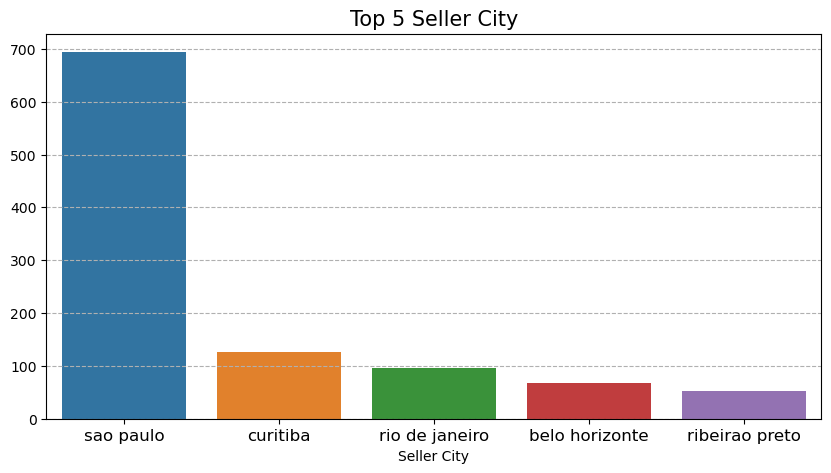

In [78]:
plt.figure(figsize = (10, 5))
plt.grid(linestyle = '--')

sns.barplot(
    y = 'city_seller_count', 
    x = 'seller_city',
    data = by_seller_city.sort_values('city_seller_count', ascending = False).head(5),
)

plt.title('Top 5 Seller City', loc = "center", fontsize = 15)
plt.ylabel(None)
plt.xlabel('Seller City')
plt.tick_params(axis = 'x', labelsize = 12);

Berdasarkan visualisasi data diatas didapatkan jika Sao Paolo, Curitiba, Rio De Janeiro, Belo Horizonte dan Ribeiro Preto merupakan 5 kota teratas dengan jumlah seller terbanyak. Sao Paolo merupakan peringkat paling pertama.

**_________________________________________________________________________________________________________**

## **Visualization Customer Favorite Payments**

- Metode pembayaran apa yang paling banyak digunakan oleh customer dalam pembelian produk?

In [79]:
fav_payments = all_data.groupby('payment_type').order_id.nunique().sort_values(ascending = False).reset_index()
fav_payments.rename(columns = {
    'order_id' : 'payment_count'
}, inplace = True)

fav_payments

,payment_type,payment_count
0,credit_card,75991
1,boleto,19614
2,voucher,3766
3,debit_card,1521
4,not_defined,1


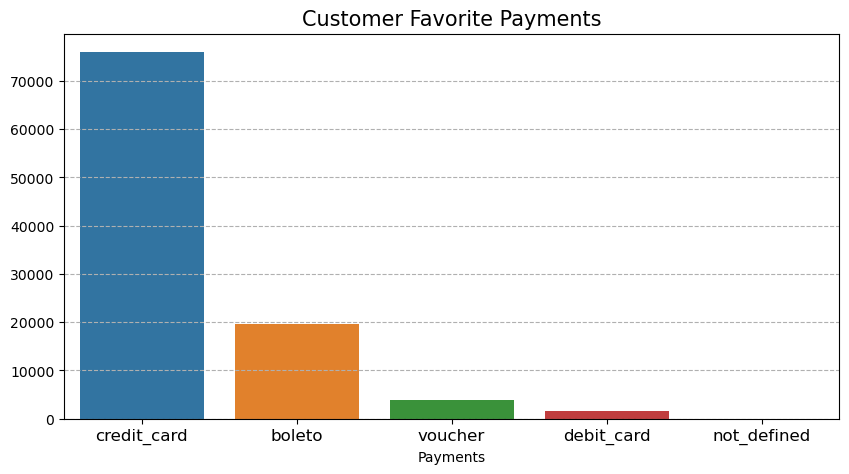

In [80]:
plt.figure(figsize = (10, 5))
plt.grid(linestyle = '--')

sns.barplot(
    y = 'payment_count', 
    x = 'payment_type',
    data = fav_payments.sort_values('payment_count', ascending = False).head(5),
)

plt.title('Customer Favorite Payments', loc = "center", fontsize = 15)
plt.ylabel(None)
plt.xlabel('Payments')
plt.tick_params(axis = 'x', labelsize = 12);

Didapatkan credit card merupakan metode pembayaran favorite para customer karna mereka paling banyak menggunakan credit card sebagai pembayaran. 

Dari sini bisa kita ambil peluang jika ingin meningkatkan penjualan atau menarik customer untuk berbelanja dapat dilakukannya promosi. bisa berupa potongan harga atau mendapatkan coin/point yang bisa dikumpulkan dan ditukarkan kemudian hari jika pembayaran menggunakan credit card.

**_________________________________________________________________________________________________________**

## **Visualization Data High Sales Product**

- Produk apa yang memiliki sales tertinggi?

Menjawab pertanyaan keempat kita meggunakan data yang sudah di merge yaitu pro_high_order untuk mengetahui nama produk dan jumlah harga penjualan yang didapat. kemudian disimpan pada dataset baru high_sales untuk memvisualisasikannya.

In [81]:
high_sales = all_data.groupby('product_category_name').price.nunique().sort_values(ascending = False).reset_index().head(10)
high_sales.rename(columns = {
    'price' : 'price_total'
}, inplace = True)

high_sales

,product_category_name,price_total
0,beleza_saude,1263
1,esporte_lazer,1139
2,utilidades_domesticas,1110
3,informatica_acessorios,1003
4,cama_mesa_banho,871
5,automotivo,869
6,relogios_presentes,863
7,moveis_decoracao,788
8,brinquedos,650
9,ferramentas_jardim,623


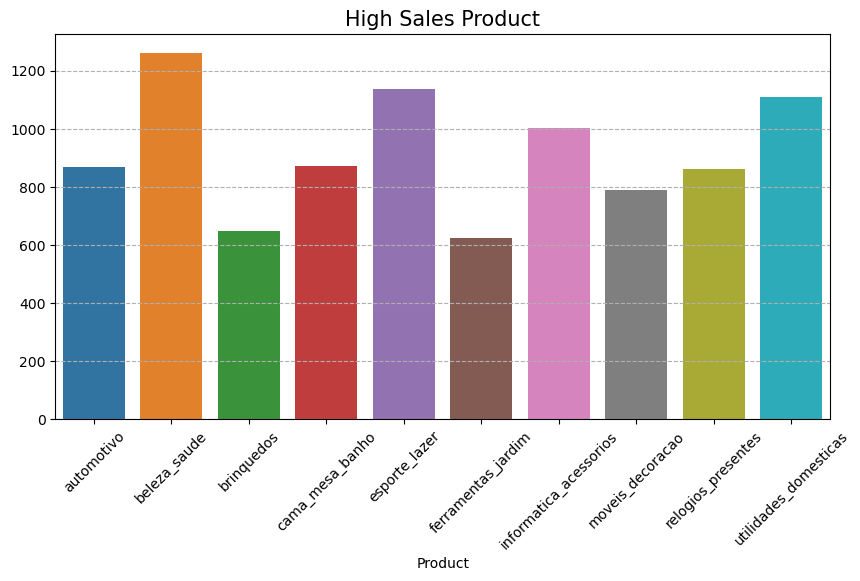

In [82]:
plt.figure(figsize = (10,5))
plt.grid(linestyle = '--')

sns.barplot(
    y = 'price_total',
    x = 'product_category_name',
    data = high_sales.sort_values('product_category_name', ascending = True).head(10)
)

plt.title('High Sales Product', loc = "center", fontsize = 15)
plt.ylabel(None)
plt.xlabel('Product')
plt.tick_params(axis = 'x', labelsize = 10, rotation = 45);

Dari hasil visualisasi diatas didapatkan 10 high sales product. 3 produk dengan penjualan paling tinggi ialah beleza_saude, esporte_lazer dan utilidades_domesticas.

Jadi para seller bisa meningkatkan quantity kepada produk dengan penjualan teratas agar bisa memenuhi permintaan pembelian customer dan bisa mendapatkan peluang meningkatkan pemasukan dengan penjualan yang meningkat juga. Para seller juga dapat melakukan banyak promosi seperti diskon atau pembelian paket terhadap produk dengan sales teratas agar dapat memancing minat customer.

# **Saving Data**

In [83]:
by_seller_city.to_csv('by_seller_city.csv', index = False)
fav_payments.to_csv('fav_payments.csv', index = False)
high_sales.to_csv('high_sales.csv', index = False)

In [84]:
all_data.to_csv('all_data.csv', index = False)